In [1]:
import os
import random
import numpy as np
import itertools as it
from tqdm import tqdm_notebook as tqdm

In [2]:
from torchvision.utils import make_grid

In [3]:
from constants import path_to_data, num_images, num_rotations, patch_size, max_size
from utils import load_png_tuple
from augmentation import *
from show import *

In [4]:
%load_ext line_profiler

In [5]:
SEED = 238122

In [6]:
def lenghts_split(size, perc):
    train_l =  int(0.9 * size)
    return train_l, size - train_l

In [7]:
random.seed(SEED)

n_img_train, n_img_val = lenghts_split(num_images, .9)

img_indices = np.random.permutation(num_images)
train_ind = img_indices[:n_img_train]
val_ind = img_indices[n_img_train:]

assert len(val_ind) == n_img_val
len(train_ind), len(val_ind)

(376, 42)

In [8]:
from dataset import FacadesDatasetRandomRot

In [11]:
def random_crop(img, lbl, crop_size=patch_size):
    assert type(img) is torch.Tensor
    
    h,w = img.shape[1:]
    top = random.randint(0, h-patch_size-1)
    left = random.randint(0, w-patch_size-1)
    return img[:, top:top+patch_size, left:left+patch_size],\
            lbl[:, top:top+patch_size, left:left+patch_size]

In [12]:
dset = FacadesDatasetRandomRot('{}/images/rot_aug_{}'.format(path_to_data, max_size), random_crop)

(256, 256, 3) (256, 256, 1)


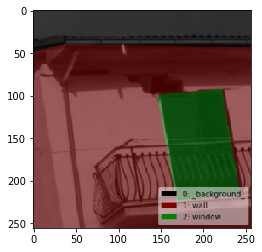

In [28]:
show_labeled_img(*dset[0])